In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv



DATA CLEANING
Missing Values : 
Datetime    0
AEP_MW      0
dtype: int64
Duplicate Values : 
0

DATA ANALYSIS
Summary Statistics : 
                            Datetime         AEP_MW
count                         121273  121273.000000
mean   2011-09-02 03:17:01.553025024   15499.513717
min              2004-10-01 01:00:00    9581.000000
25%              2008-03-17 15:00:00   13630.000000
50%              2011-09-02 04:00:00   15310.000000
75%              2015-02-16 17:00:00   17200.000000
max              2018-08-03 00:00:00   25695.000000
std                              NaN    2591.399065


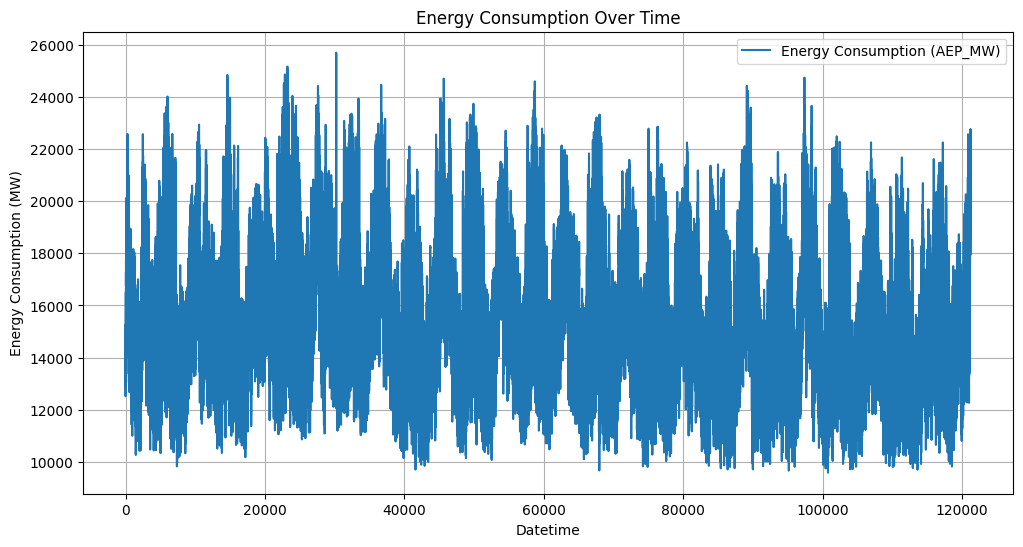

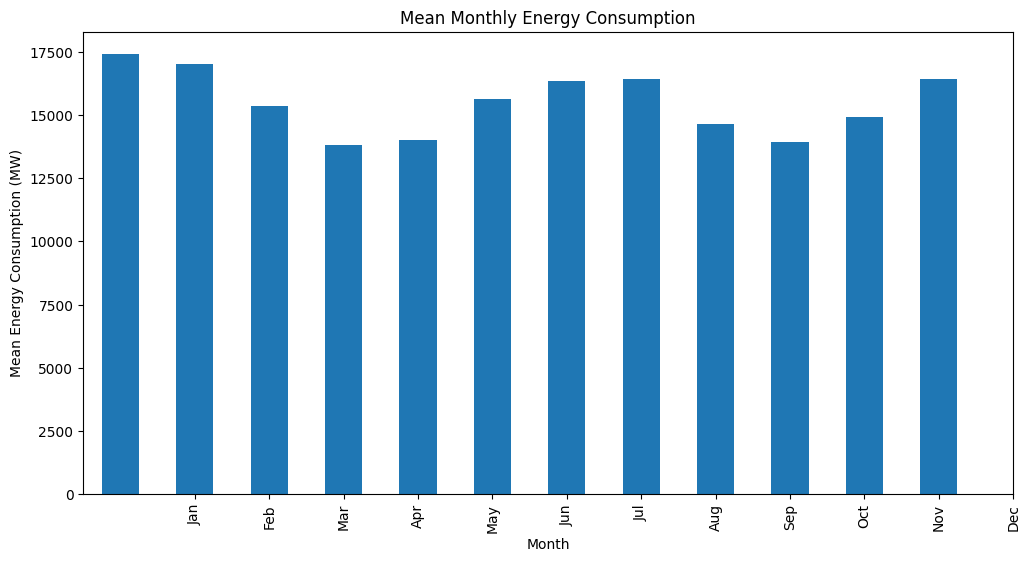


DATA ANALYSIS
Data Cleaned and Saved !


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
BLUE = "\033[94m"
RESET = "\033[0m"

# Load the dataset
df = pd.read_csv("/kaggle/input/hourly-energy-consumption/AEP_hourly.csv")

# Convert the "Datetime" column to datetime data type
df["Datetime"] = pd.to_datetime(df["Datetime"])

# DATA CLEANING
print(BLUE + "\nDATA CLEANING" + RESET)
# Check for missing values
missing_values = df.isnull().sum()
print(GREEN + "Missing Values : " + RESET)
print(missing_values)

# Handle missing values
df.dropna(inplace=True)

# Check for duplicate values
duplicate_values = df.duplicated().sum()
print(GREEN + "Duplicate Values : " + RESET)
print(duplicate_values)

# Drop duplicate values
df.drop_duplicates(inplace=True)

# DATA ANALYSIS
print(BLUE + "\nDATA ANALYSIS" + RESET)
# Summary Statistics
summary_stats = df.describe()
print(GREEN + "Summary Statistics : " + RESET)
print(summary_stats)

# Data Visualization
# Line plot for energy consumption over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["AEP_MW"], label="Energy Consumption (AEP_MW)")
plt.xlabel("Datetime")
plt.ylabel("Energy Consumption (MW)")
plt.title("Energy Consumption Over Time")
plt.grid()
plt.legend()

# Group data by month and calculate the monthly mean energy consumption
monthly_energy_consumption = df.groupby(df["Datetime"].dt.month)["AEP_MW"].mean()

# Data Visualization: Bar plot for monthly energy consumption
plt.figure(figsize=(12, 6))
monthly_energy_consumption.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Mean Energy Consumption (MW)")
plt.title("Mean Monthly Energy Consumption")

# Rename the x-axis labels to display month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

# SAVING THE FILE
df.to_csv("/kaggle/working/cleaned_AEP_hourly.csv", index=False)
print(BLUE + "\nDATA ANALYSIS" + RESET)
print(GREEN + "Data Cleaned and Saved !" + RESET)
